In [1]:
from common import colors

In [2]:
import os
os.chdir(os.path.join('..', '..', '..'))
print(os.getcwd())

/Users/eharkin/Documents/projects/5HTGIF


In [3]:
import pickle

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
from ezephys import pltools
import ezephys.stimtools as st

from grr.AugmentedGIF import AugmentedGIF
from grr.ThresholdModel import constructMedianModel

In [4]:
plt.style.use(os.path.join('figs', 'scripts', 'writeup', 'publication_figure_style.dms'))
IMG_PATH = os.path.join('figs', 'ims', 'writeup', 'GIF_demo_traces')

In [5]:
MODEL_PATH = os.path.join('data', 'models', '5HT')

In [6]:
with open(os.path.join(MODEL_PATH, '5HT_AugmentedGIFs.lmod'), 'rb') as f:
    models = pickle.load(f)

median_agif = constructMedianModel(type(models[0]), models)

with open(os.path.join(MODEL_PATH, '5HT_GIFs.lmod'), 'rb') as f:
    models = pickle.load(f)
    
median_gif = constructMedianModel(type(models[0]), models)

del f, models

In [7]:
step_input = st.StepStimulus([200, 500, 300], [0, 0.040, 0.070], dt=0.1)

Text(0,0.5,'$\\gamma$')

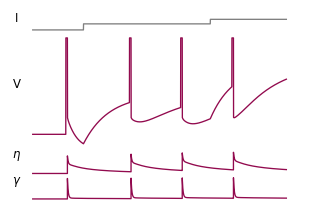

In [8]:
spec = gs.GridSpec(4, 1, height_ratios=(0.1, 1, 0.2, 0.2), hspace=0.05)

plt.subplot(spec[0, :])
step_input.plot(color=colors['input'], clip_on=False)
pltools.hide_border('a')
pltools.hide_ticks()
plt.ylabel('I', rotation=0)
plt.xlabel('')

t, V, eta, threshold, _ = median_gif.simulate(step_input.command.flatten(), median_gif.El)

plt.subplot(spec[1, :])
plt.plot(t, V, color=colors['gif'])
pltools.hide_border('a')
pltools.hide_ticks()
plt.ylabel('V', rotation=0)

plt.subplot(spec[2, :])
plt.plot(t, eta, color=colors['gif'], clip_on=True)
pltools.hide_border('a')
pltools.hide_ticks()
plt.ylabel('$\eta$', rotation=0)

plt.subplot(spec[3, :])
plt.plot(t, threshold, color=colors['gif'], clip_on=True)
pltools.hide_border('a')
pltools.hide_ticks()
plt.ylabel('$\gamma$', rotation=0)

In file included from /Users/eharkin/.cache/weave/python27_compiled/sc_8c65f3f97a0e23ec2603fa03667c08fe0.cpp:17:
In file included from /miniconda3/envs/neopozz/lib/python2.7/site-packages/weave/scxx/list.h:16:
/miniconda3/envs/neopozz/lib/python2.7/site-packages/weave/scxx/sequence.h:106:16: warning: 'py::sequence::set_item' hides overloaded virtual function [-Woverloaded-virtual]
  virtual void set_item(int ndx, object& val) {
               ^
/miniconda3/envs/neopozz/lib/python2.7/site-packages/weave/scxx/object.h:781:16: note: hidden overloaded virtual function 'py::object::set_item' declared here: type mismatch at 1st parameter ('const py::object &' vs 'int')
  virtual void set_item(const object& key, const object& val) {
               ^
In file included from /Users/eharkin/.cache/weave/python27_compiled/sc_8c65f3f97a0e23ec2603fa03667c08fe0.cpp:19:
/miniconda3/envs/neopozz/lib/python2.7/site-packages/weave/scxx/dict.h:173:16: warning: 'py::dict::set_item' hides overloaded virtual 

(0, 0.07)

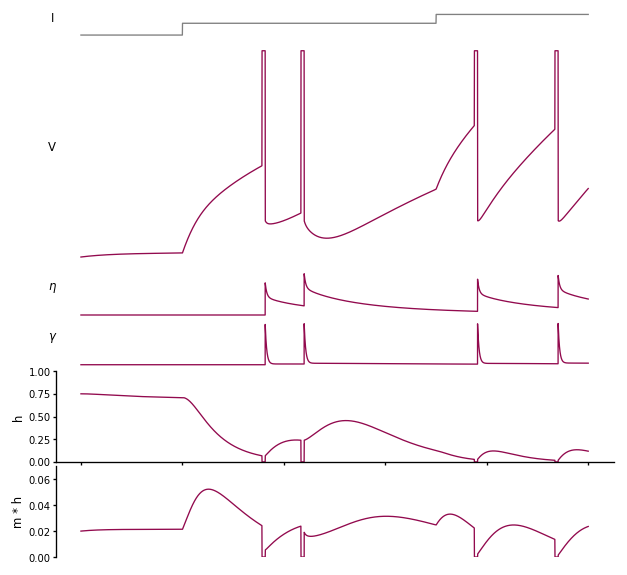

In [9]:
spec = gs.GridSpec(6, 1, height_ratios=(0.1, 1, 0.2, 0.2, 0.4, 0.4), hspace=0.05)

plt.figure(figsize=(6, 6))
plt.subplot(spec[0, :])
step_input.plot(color=colors['input'], clip_on=False)
pltools.hide_border('a')
pltools.hide_ticks()
plt.ylabel('I', rotation=0)
plt.xlabel('')

agif_sim = median_agif.simulate(step_input.command.flatten(), median_gif.El, return_dict=True)

plt.subplot(spec[1, :])
plt.plot(agif_sim['time'], agif_sim['V'], color=colors['gif'])
pltools.hide_border('a')
pltools.hide_ticks()
plt.ylabel('V', rotation=0)

plt.subplot(spec[2, :])
plt.plot(agif_sim['time'], agif_sim['eta_sum'], color=colors['gif'], clip_on=True)
pltools.hide_border('a')
pltools.hide_ticks()
plt.ylabel('$\eta$', rotation=0)

plt.subplot(spec[3, :])
plt.plot(agif_sim['time'], agif_sim['V_T'], color=colors['gif'], clip_on=True)
pltools.hide_border('a')
pltools.hide_ticks()
plt.ylabel('$\gamma$', rotation=0)

plt.subplot(spec[4, :])
plt.plot(agif_sim['time'], agif_sim['h'], color=colors['gif'], clip_on=True)
pltools.hide_border('tr')
#pltools.hide_ticks()
plt.ylabel('h')
plt.ylim(0, 1)

plt.subplot(spec[5, :])
plt.plot(agif_sim['time'], agif_sim['m'] * agif_sim['h'], color=colors['gif'], clip_on=True)
pltools.hide_border('trb')
#pltools.hide_ticks()
plt.ylabel('m * h')
plt.ylim(0, 0.07)